# Procesamiento de los datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from datetime import datetime

In [3]:
df = pd.read_csv("/content/drive/MyDrive/TAE Trabajo 1/incidentes_viales (2).csv", sep = ";",  low_memory = False , encoding = 'utf_8')


In [4]:
df.head()

,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,MES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y
0,2014,1105,Otro,CR 66 B CL 34,CR 066 B 034 000 00000,Tramo de via,A000095088,05/08/2014 07:15:00,2014-08-05T12:15:00.000Z,Con heridos,8,1451888,11,Los Conquistadores,Laureles Estadio,"[-75.589313202, 6.2397866157]",832677.92
1,2014,0509,Choque,CR 71 CL 103 D,CR 071 103 D 000 00000,Interseccion,A000095143,05/08/2014 14:30:00,2014-08-05T19:30:00.000Z,Con heridos,8,1451891,05,Girardot,Castilla,"[-75.5708179064, 6.3000411778]",834744.36
2,2014,1421,Choque,CR 49 CL 7,CR 049 007 000 00000,Tramo de via,A000095226,05/08/2014 15:50:00,2014-08-05T20:50:00.000Z,Con heridos,8,1451935,14,Patio Bonito,El Poblado,"[-75.5765743781, 6.20874755798]",834078.39
3,2014,0801,Otro,CR 39 A CL 66 C,CR 039 A 066 C 000 00000,Tramo de via,A000095227,05/08/2014 13:00:00,2014-08-05T18:00:00.000Z,Con heridos,8,1451956,08,Villa Hermosa,Villa Hermosa,"[-75.5512546684, 6.25905761463]",836897.02
4,2014,1017,Choque,CL 58 CR 37,CL 058 037 000 00000,Tramo de via,A000094940,05/08/2014 19:30:00,2014-08-06T00:30:00.000Z,Con heridos,8,1452022,10,Los Ángeles,La Candelaria,"[-75.5561495119, 6.24996631944]",836352.35


### Análisis de los datos crudos

Como se puede ver existe un desfase entre la previsualisación y los datos descargados de Medata, por lo tanto es necesario reorganizar las variables según corresponda.

In [5]:
df.rename({'MES': 'GRAVEDAD','NRO_RADICADO':'MES','NUMCOMUNA':'NRO_RADICADO','BARRIO':'NUMCOMUNA','COMUNA':'BARRIO','LOCATION':'COMUNA','X': 'LOCATION','Y':'X'}, axis = 1, inplace = True)# Se reorganizan los nombres de la columna pues hay un

Para inspeccionar los datos faltantes.

In [6]:
df.isna().sum()

AÑO                          0
CBML                     18156
CLASE_ACCIDENTE              6
DIRECCION                    0
DIRECCION ENCASILLADA      391
DISEÑO                    1148
EXPEDIENTE                 110
FECHA_ACCIDENTE              0
FECHA_ACCIDENTES             0
GRAVEDAD                     0
MES                          0
NRO_RADICADO                 5
NUMCOMUNA                    0
BARRIO                   19006
COMUNA                   12798
LOCATION                     0
X                            0
dtype: int64

## Eliminación de Variables

Se eliminan las siguientes variables. Expediente = Es un registro aleatorio sin análiss, NRo _ Radicao = Numero aleatorio, Direccion Encasillada = Se repite, FECHA_ACCIDENTES = Se repite, COMUNA = se tumba comuna pues tiene mucho nan y existe otra columna con la misma información , CBML = Mucha inconsistencia en caso de requerir el codigo catastral se puede buscar una página externa que reciba el código  catastraly entregue la localización , X = Debido a que existe un problema en la descarga de la base de datos no existe datos de la variable 'y' entonces es necesario eliminar la componente 'x' pues en ausencia de 'y', 'x' pierde sentido.
Se eliminara la dirección pues tampoco hay una nomeclatura clara. Verificar luego.

In [7]:
df.columns

Index(['AÑO', 'CBML', 'CLASE_ACCIDENTE', 'DIRECCION', 'DIRECCION ENCASILLADA',
       'DISEÑO', 'EXPEDIENTE', 'FECHA_ACCIDENTE', 'FECHA_ACCIDENTES',
       'GRAVEDAD', 'MES', 'NRO_RADICADO', 'NUMCOMUNA', 'BARRIO', 'COMUNA',
       'LOCATION', 'X'],
      dtype='object')

In [8]:
df.head()

,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,GRAVEDAD,MES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X
0,2014,1105,Otro,CR 66 B CL 34,CR 066 B 034 000 00000,Tramo de via,A000095088,05/08/2014 07:15:00,2014-08-05T12:15:00.000Z,Con heridos,8,1451888,11,Los Conquistadores,Laureles Estadio,"[-75.589313202, 6.2397866157]",832677.92
1,2014,0509,Choque,CR 71 CL 103 D,CR 071 103 D 000 00000,Interseccion,A000095143,05/08/2014 14:30:00,2014-08-05T19:30:00.000Z,Con heridos,8,1451891,05,Girardot,Castilla,"[-75.5708179064, 6.3000411778]",834744.36
2,2014,1421,Choque,CR 49 CL 7,CR 049 007 000 00000,Tramo de via,A000095226,05/08/2014 15:50:00,2014-08-05T20:50:00.000Z,Con heridos,8,1451935,14,Patio Bonito,El Poblado,"[-75.5765743781, 6.20874755798]",834078.39
3,2014,0801,Otro,CR 39 A CL 66 C,CR 039 A 066 C 000 00000,Tramo de via,A000095227,05/08/2014 13:00:00,2014-08-05T18:00:00.000Z,Con heridos,8,1451956,08,Villa Hermosa,Villa Hermosa,"[-75.5512546684, 6.25905761463]",836897.02
4,2014,1017,Choque,CL 58 CR 37,CL 058 037 000 00000,Tramo de via,A000094940,05/08/2014 19:30:00,2014-08-06T00:30:00.000Z,Con heridos,8,1452022,10,Los Ángeles,La Candelaria,"[-75.5561495119, 6.24996631944]",836352.35


In [9]:
df.drop(['EXPEDIENTE','DIRECCION','NRO_RADICADO','DIRECCION ENCASILLADA', 'FECHA_ACCIDENTES','COMUNA','CBML','X'],axis = 1 , inplace = True)

In [10]:
df.isna().sum()

AÑO                    0
CLASE_ACCIDENTE        6
DISEÑO              1148
FECHA_ACCIDENTE        0
GRAVEDAD               0
MES                    0
NUMCOMUNA              0
BARRIO             19006
LOCATION               0
dtype: int64

In [11]:
df.columns

Index(['AÑO', 'CLASE_ACCIDENTE', 'DISEÑO', 'FECHA_ACCIDENTE', 'GRAVEDAD',
       'MES', 'NUMCOMUNA', 'BARRIO', 'LOCATION'],
      dtype='object')

## Problemas enconding

Como se muestra a continuación, se presenta un error en la lectura de los datos inclusive luego de utilizar enconding = utf -8, por lo tanto es necesario organizar la cantidad de datos paso a paso.

In [12]:
df['GRAVEDAD'].unique()

array(['Con heridos', 'Solo daños', 'Con muertos', 'Solo da\\xF1os'],
      dtype=object)

In [13]:
df['AÑO']= df['AÑO'].apply(lambda x : '2019' if x == '2019\\r' else x)
df['DISEÑO'] = df['DISEÑO'].apply(lambda x : 'Pontón' if x == 'Pont\\xF3n' else x)
df['HORA'] = df['FECHA_ACCIDENTE'].apply(lambda x: x.split(' ')[1])
df['FECHA_ACCIDENTE'] = df['FECHA_ACCIDENTE'].apply(lambda x: x.split(' ')[0])
df['GRAVEDAD'] = df['GRAVEDAD'].apply(lambda x: 'Solo daños' if x == 'Solo da\\xF1os' else x)
df['CLASE_ACCIDENTE'] = df['CLASE_ACCIDENTE'].apply(lambda x : 'Caída de Ocupante' if type(x) != float and x[0:2] =='Ca' else x)



Para el número de comuna hay muchos datos que no son consistentes ('0','Sin Inf','In','SN','AU'). Se coloca 99 que corresponde a toda la ciudad es decir en cualquier parte o que no hay información.

In [14]:
df['NUMCOMUNA'].unique()

array(['11', '05', '14', '08', '10', '04', '03', '13', '16', '09', '15',
       '06', '07', 'Sin Inf', '80', '01', '12', '90', '60', '02', 'In',
       '70', '0', '50', 'SN', 'AU', '5', '7', '9', '4', '3', '1', '2',
       '8', '6'], dtype=object)

In [15]:
len(df[df['NUMCOMUNA'].isin(['0','Sin Inf','In','SN','AU'])])

20127

In [16]:
df['NUMCOMUNA'] = df['NUMCOMUNA'].apply(lambda x: '99' if x in(['0','Sin Inf','In','SN','AU']) else x)

In [17]:
df['NUMCOMUNA'].unique()

array(['11', '05', '14', '08', '10', '04', '03', '13', '16', '09', '15',
       '06', '07', '99', '80', '01', '12', '90', '60', '02', '70', '50',
       '5', '7', '9', '4', '3', '1', '2', '8', '6'], dtype=object)

La base de Medata exhibe un comportamiento anomalo pues para ciertas palabras realiza la codificación correctamente mientras que para otras no. Por ende es necesario organizar los datos de forma manual para las palabras que se pueden detectar.

In [18]:
def encondebarrio(x):
    
    z = {'Bel\\xE9n' : 'Belén', 'Belalc\\xE1zar' : 'Belalcázar','H\\xE9ctor Abad G\\xF3mez': 'Héctor Abad Gómez',
        'San Joaqu\\xEDn' : 'San Joaquín', 'Santa F\\xE9' : 'Santa Fé', 'Coraz\\xF3n de Jes\\xFAs' : 'Corazón de Jesús',
        'Alfonso L\\xF3pez': 'Alfonso López', 'Santa Mar\\xEDa de Los \\xC1ngeles' : 'Santa María de Los Ángeles',
        'El Rinc\\xF3n' : 'El Rincón', 'Alejandr\\xEDa': 'Alejandría', 'Campo Vald\\xE9s No. 1' : 'Campo Valdés No. 1',
        'Barrio Col\\xF3n' : 'Barrio Colón','Jard\\xEDn Bot\\xE1nico' : 'Jardín Botánico', 'Estaci\\xF3n Villa' : 'Estación Villa',
       'Barrio de Jes\\xFAs' : 'Barrio de Jesús', 'Barrio Crist\\xF3bal': 'Barrio Cristóbal', 'Boyac\\xE1' : 'Boyacá',
       'Mosc\\xFA No. 1':'Moscú No. 1', 'Sim\\xF3n Bol\\xEDvar' : 'Simón Bolívar', 'Nueva Villa de la Iguan\\xE1' : 'Nueva Villa de la Iguaná',
        'Bombon\\xE1 No. 2': 'Bomboná No. 2', 'La Pi\\xF1uela' : 'La Piñuela' , 'Play\\xF3n de Los Comuneros': 'Playón de Los Comuneros',
       'Jes\\xFAs Nazareno' : 'Jesús Nazareno', '\\xC1rea de Expansi\\xF3n Pajarito': 'Área de Expansión Pajarito', 'F\\xE1tima':'Fátima',
        'San Germ\\xE1n' : 'San Germán', 'Diego Echavarr\\xEDa':'Diego Echavarría', 'Mosc\\xFA No. 2':'Moscú No. 2', 'La Am\\xE9rica': 'La América',
        'Alejandro Echavarr\\xEDa':'Alejandro Echavarría','L\\xF3pez de Mesa':'López de Mesa', 'Los \\xC1ngeles' : 'Los Ángeles',
       '\\xC1rea de Expansi\\xF3n Altos de Calasanz':'Área de Expansión Altos de Calasanz' ,'Santa Mar\\xEDa de los \\xC1ngeles' : 'Santa María de los Ángeles', 
        'Santa M\\xF3nica': 'Santa Mónica', 'La Mansi\\xF3n': 'La Mansión', 'San Mart\\xEDn de Porres':'San Martín de Porres', 'C\\xF3rdoba': 'Córdoba',
       'Santa Luc\\xEDa': 'Santa Lucía', 'Batall\\xF3n Girardot': 'Batallón Girardot', 'El Vel\\xF3dromo':'El Velódromo', 'Andaluc\\xEDa': 'Andalucía', 
        'Bombon\\xE1 No.1' :'Bomboná No.1' , 'Mar\\xEDa Cano Carambolas': 'María Cano Carambolas', 'Nueva Villa de Aburr\\xE1' : 'Nueva Villa de Aburrá',
       '\\xC1rea de Expansi\\xF3n San Antonio de Prado': 'Área de Expansión San Antonio de Prado','Los Alc\\xE1zares' : 'Los Alcázares', 'El Coraz\\xF3n': 'El Corazón',
        'Catalu\\xF1a' : 'Cataluña', 'Berl\\xEDn': 'Berlín', 'Antonio Nari\\xF1o' : 'Antonio Nariño', 'Hospital San Vicente de Pa\\xFAl': 'Hospital San Vicente de Paúl',
       'San Jos\\xE9 de la Monta\\xF1a' : 'San José de la Montaña', 'Campo Vald\\xE9s No.2' : 'Campo Valdés No.2', 'San Jos\\xE9 la Cima No.2': 'San José la Cima No.2',
        'Mosc\\xFA No.2' : 'Moscú No. 2', 'San Jos\\xE9 la Cima No. 1': 'San José la Cima No. 1', 'Bombon\\xE1 No. 1' : 'Bomboná No. 1', 'Santa In\\xE9s': 'Santa Inés',
        'Campo Vald\\xE9s No. 2' : 'Campo Valdés No. 2'}
    
    
    if x in z:
        x = z[x]
    elif type(x) == float :
        x = None
    elif x[0] in ['0','1','2','3','4','5','6','7','8','9']:
        x = None
    else:
        x = x
    return x

In [19]:
df.isna().sum()

AÑO                    0
CLASE_ACCIDENTE        6
DISEÑO              1148
FECHA_ACCIDENTE        0
GRAVEDAD               0
MES                    0
NUMCOMUNA              0
BARRIO             19006
LOCATION               0
HORA                   0
dtype: int64

In [20]:
df['BARRIO'] = df['BARRIO'].apply(encondebarrio)

In [21]:
df.isna().sum()

AÑO                    0
CLASE_ACCIDENTE        6
DISEÑO              1148
FECHA_ACCIDENTE        0
GRAVEDAD               0
MES                    0
NUMCOMUNA              0
BARRIO             20613
LOCATION               0
HORA                   0
dtype: int64

Se crean nuevas variables para comprender mejor la base de datos

In [22]:
df.columns

Index(['AÑO', 'CLASE_ACCIDENTE', 'DISEÑO', 'FECHA_ACCIDENTE', 'GRAVEDAD',
       'MES', 'NUMCOMUNA', 'BARRIO', 'LOCATION', 'HORA'],
      dtype='object')

In [23]:
df['HORA'] = df['HORA'].apply(lambda x: None if x == 'Sin' or x == '' else x)

Se convierten las columnas de fecha y hora en tipo de datos de tiempo

In [24]:
df['HORA'] = pd.to_datetime(df['HORA'],format= '%H:%M:%S' ).dt.time
df['FECHA_ACCIDENTE'] = pd.to_datetime(df['FECHA_ACCIDENTE'], format="%d/%m/%Y")

In [25]:
df['SEMANA'] = df['FECHA_ACCIDENTE'].apply(lambda x : 'Semana' +' '+ x.strftime("%V"))
df['MES'] = df['FECHA_ACCIDENTE'].dt.month
df['DIA_DEL_AÑO'] = df['FECHA_ACCIDENTE'].apply(lambda x: str(x.timetuple().tm_yday)) 
df['DIA_DEL_MES'] = df['FECHA_ACCIDENTE'].apply(lambda x: x.strftime('%d'))
df['DIA_SEMANA'] = df['FECHA_ACCIDENTE'].apply(lambda x: x.strftime('%A'))

In [26]:
df['LOCATIION2'] = df['LOCATION'].apply(lambda x: x.split(',')) 
df['LONGITUD'] = df['LOCATIION2'].apply(lambda x: float (x[0][1:-1]))
df['ALTITUD'] = df['LOCATIION2'].apply(lambda x: float (x[1][1:-1]))
df.drop(['LOCATION','LOCATIION2'], axis = 1, inplace = True)

In [27]:
def momentodia(x):
    
    H1 = datetime.strptime('06:00:00', "%X").time()
    H2 = datetime.strptime('12:00:00', "%X").time()
    H3 = datetime.strptime('18:00:00', "%X").time()
    H4 = datetime.strptime('23:59:59', "%X").time()
    
    if type(x) != type(H1):
        return None
    elif x >= H1 and x < H2:
        return 'Mañana'
    elif x >= H2 and x < H3:
        return 'Tarde'
    elif x >= H3 and x < H4:
        return 'Noche'
    else:
        return 'Madrugada'
    

In [28]:
df['MOMENTO'] = df['HORA'].apply(momentodia)

In [29]:
df.head()

,AÑO,CLASE_ACCIDENTE,DISEÑO,FECHA_ACCIDENTE,GRAVEDAD,MES,NUMCOMUNA,BARRIO,HORA,SEMANA,DIA_DEL_AÑO,DIA_DEL_MES,DIA_SEMANA,LONGITUD,ALTITUD,MOMENTO
0,2014,Otro,Tramo de via,2014-08-05,Con heridos,8,11,Los Conquistadores,07:15:00,Semana 32,217,05,Tuesday,-75.589313,6.239787,Mañana
1,2014,Choque,Interseccion,2014-08-05,Con heridos,8,05,Girardot,14:30:00,Semana 32,217,05,Tuesday,-75.570818,6.300041,Tarde
2,2014,Choque,Tramo de via,2014-08-05,Con heridos,8,14,Patio Bonito,15:50:00,Semana 32,217,05,Tuesday,-75.576574,6.208748,Tarde
3,2014,Otro,Tramo de via,2014-08-05,Con heridos,8,08,Villa Hermosa,13:00:00,Semana 32,217,05,Tuesday,-75.551255,6.259058,Tarde
4,2014,Choque,Tramo de via,2014-08-05,Con heridos,8,10,Los Ángeles,19:30:00,Semana 32,217,05,Tuesday,-75.556150,6.249966,Noche


#### Análisis de la cantidad de datos perdidos que no se pudieron recuperar

In [30]:
df_datos = df.groupby(['AÑO','MES'])[['BARRIO']].agg([ lambda x : x.isnull().sum(), lambda x : x.notnull().sum()])
df_datos.columns = df_datos.columns.get_level_values(1)
df_datos.rename({df_datos.columns[0]:'Data perdida',df_datos.columns[1] : 'Datos completos'}, axis = 1, inplace = True)
df_perdidos=df_datos
df_datos.head(20)

Data perdida  Datos completos
AÑO  MES                               
2014 7             231             3189
     8             307             3633
     9             290             3587
     10            266             3470
     11            275             3337
     12            292             3538
2015 1             283             2980
     2             226             3355
     3             329             3667
     4             274             3472
     5             348             3706
     6             287             3312
     7             290             3771
     8             329             3775
     9             294             3841
     10            268             3708
     11            290             3434
     12            279             3654
2016 1             241             3081
     2             289             3569

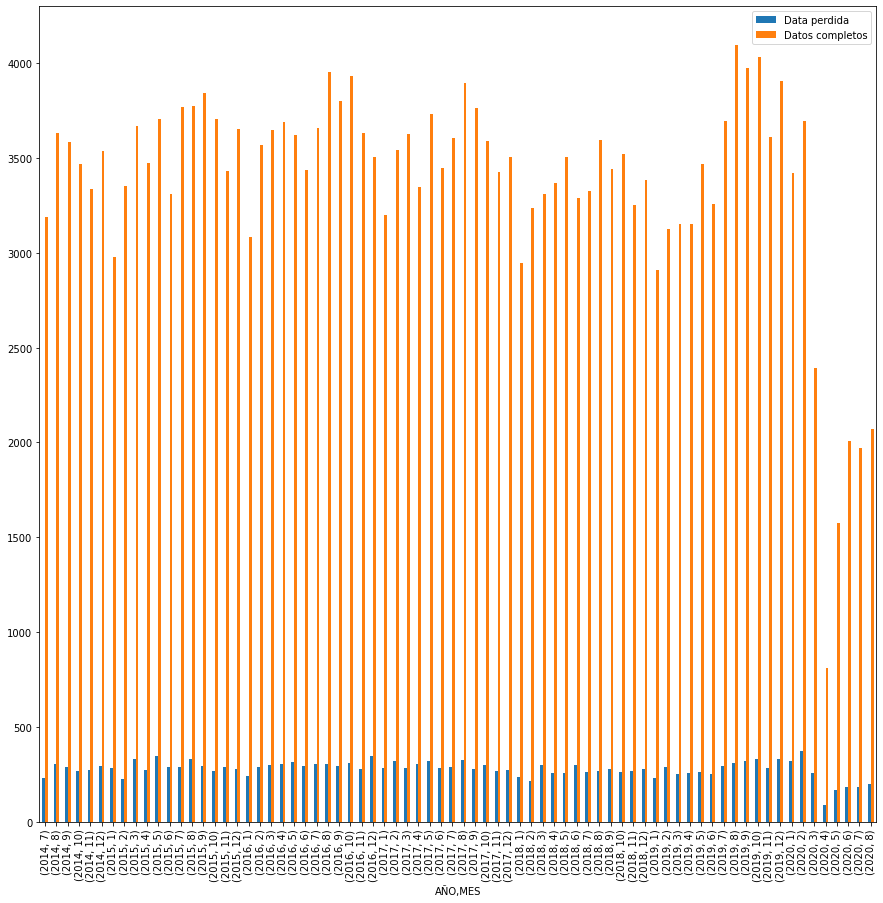

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
df_perdidos.plot.bar(ax=ax)

          Data perdida  Datos completos
AÑO  MES                               
2014 7             231             3189
     8             307             3633
     9             290             3587
     10            266             3470
     11            275             3337
     12            292             3538
2015 1             283             2980
     2             226             3355
     3             329             3667
     4             274             3472
     5             348             3706
     6             287             3312
     7             290             3771
     8             329             3775
     9             294             3841
     10            268             3708
     11            290             3434
     12            279             3654
2016 1             241             3081
     2             289             3569


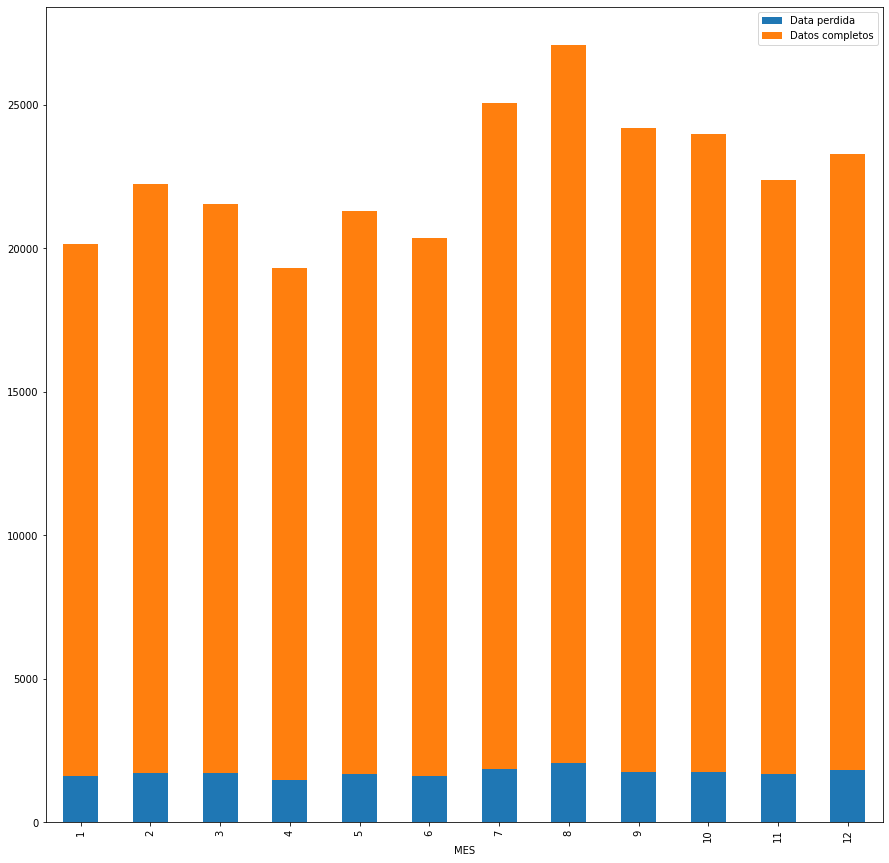

In [32]:
df_datos1 = df.groupby(['MES'])[['BARRIO']].agg([ lambda x : x.isnull().sum(), lambda x : x.notnull().sum()])
df_datos1.columns = df_datos1.columns.get_level_values(1)
df_datos1.rename({df_datos1.columns[1]:'Datos completos',df_datos1.columns[0] : 'Data perdida'}, axis = 1, inplace = True)
print(df_datos.head(20))
fig, ax = plt.subplots(figsize=(15, 15))
df_datos1.plot.bar(ax=ax,stacked=True)

In [33]:
df_datos = df_datos.reset_index()
df_datos.to_csv('Datalost.csv', index = False, encoding = 'utf-8')

Luego de haber justificado la eliminación los datos faltantes en el barrio con el proceso descriptivo. Tumbamos los datos.

In [34]:
df.dropna(inplace = True)

In [35]:
df.head()

,AÑO,CLASE_ACCIDENTE,DISEÑO,FECHA_ACCIDENTE,GRAVEDAD,MES,NUMCOMUNA,BARRIO,HORA,SEMANA,DIA_DEL_AÑO,DIA_DEL_MES,DIA_SEMANA,LONGITUD,ALTITUD,MOMENTO
0,2014,Otro,Tramo de via,2014-08-05,Con heridos,8,11,Los Conquistadores,07:15:00,Semana 32,217,05,Tuesday,-75.589313,6.239787,Mañana
1,2014,Choque,Interseccion,2014-08-05,Con heridos,8,05,Girardot,14:30:00,Semana 32,217,05,Tuesday,-75.570818,6.300041,Tarde
2,2014,Choque,Tramo de via,2014-08-05,Con heridos,8,14,Patio Bonito,15:50:00,Semana 32,217,05,Tuesday,-75.576574,6.208748,Tarde
3,2014,Otro,Tramo de via,2014-08-05,Con heridos,8,08,Villa Hermosa,13:00:00,Semana 32,217,05,Tuesday,-75.551255,6.259058,Tarde
4,2014,Choque,Tramo de via,2014-08-05,Con heridos,8,10,Los Ángeles,19:30:00,Semana 32,217,05,Tuesday,-75.556150,6.249966,Noche


In [36]:
len (df['BARRIO'].unique())

344

In [37]:
Data_train = df[df['AÑO'].isin(['2014','2015','2016','2017'])]
Data_test = df[df['AÑO'].isin(['2018','2019'])]
Data_compor = df[df['AÑO'].isin(['2020'])]
Data_cluster = df[df['AÑO'].isin(['2014','2015','2016','2017','2018','2019'])]

In [38]:
df.to_csv('Datafull.csv', index = False, encoding = 'utf-8')

In [39]:
Data_train.to_csv('Data_train.csv', index = False, encoding = 'utf-8')
Data_test.to_csv('Data_test.csv', index = False, encoding =  'utf-8')
Data_compor.to_csv('Data_compor.csv', index = False, encoding = 'utf-8')
Data_cluster.to_csv('Data_cluster.csv', index = False, encoding = 'utf-8')

# Análisis descriptivo

In [40]:
df_Tipochoque = df.groupby(['AÑO','CLASE_ACCIDENTE'])[['CLASE_ACCIDENTE']].count()
df_Tipochoque.head(20)

CLASE_ACCIDENTE
AÑO  CLASE_ACCIDENTE                   
2014 Atropello                     2311
     Caída de Ocupante             2038
     Choque                       13500
     Incendio                         4
     Otro                          2296
     Volcamiento                    476
2015 Atropello                     4373
     Caída de Ocupante             3713
     Choque                       28592
     Incendio                         1
     Otro                          4285
     Volcamiento                   1457
2016 Atropello                     4057
     Caída de Ocupante             3710
     Choque                       29057
     Incendio                         4
     Otro                          4947
     Volcamiento                   1509
2017 Atropello                     3546
     Caída de Ocupante             3448

In [41]:
df_Gravedad = df.groupby(['AÑO','GRAVEDAD'])[['GRAVEDAD']].count()
df_Gravedad

GRAVEDAD
AÑO  GRAVEDAD             
2014 Con heridos     11507
     Solo daños       9118
2015 Con heridos     23546
     Solo daños      18875
2016 Con heridos     24267
     Solo daños      19017
2017 Con heridos     22922
     Solo daños      19539
2018 Con heridos     20932
     Solo daños      19029
2019 Con heridos     22944
     Con muertos       220
     Solo daños      19221
2020 Con heridos     10798
     Con muertos       102
     Solo daños       7046

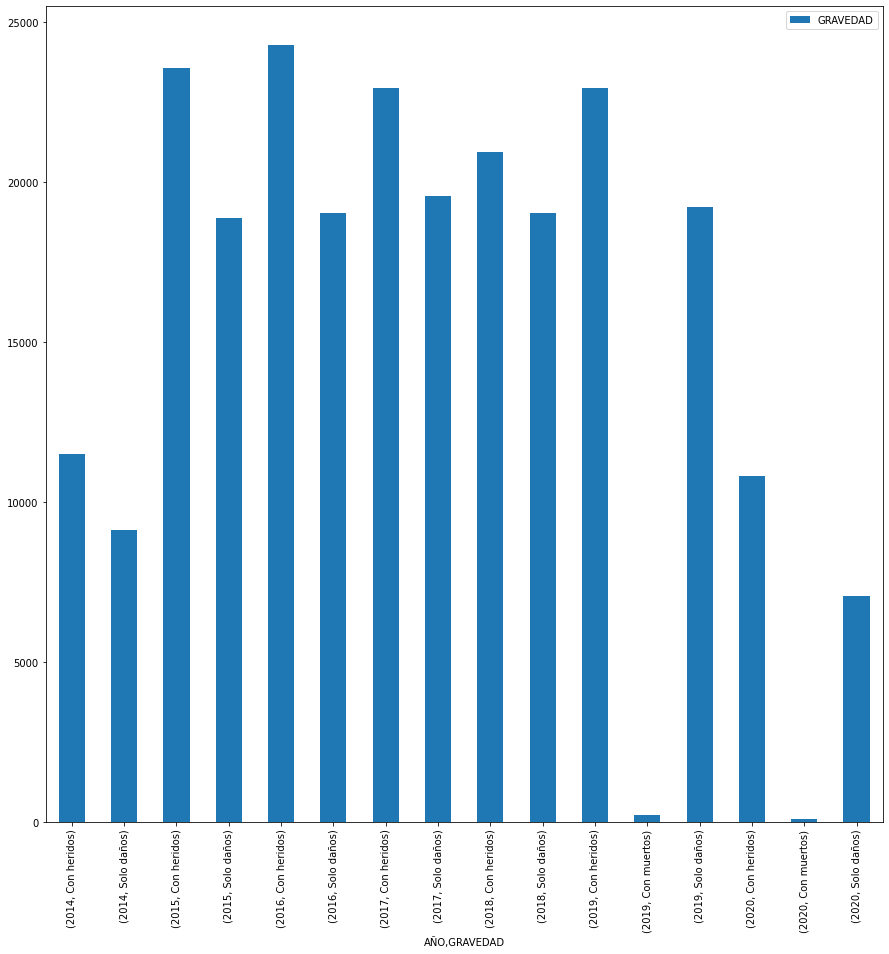

In [42]:
fig, ax = plt.subplots(figsize=(15, 15))
df_Gravedad.plot.bar(ax=ax)

In [43]:
df_ByMES = df.groupby(['AÑO','MES'])[['MES']].count()
df_ByMES.rename({df_ByMES.columns[0]:'Total'}, axis = 1, inplace = True)
df_ByMES

Total
AÑO  MES       
2014 7     3163
     8     3604
     9     3568
     10    3455
     11    3316
...         ...
2020 4      812
     5     1575
     6     2009
     7     1970
     8     2071

[74 rows x 1 columns]

In [44]:
df_Bycomuna = df.groupby(['AÑO','NUMCOMUNA'])[['NUMCOMUNA']].count()
df_Bycomuna.rename({df_Bycomuna.columns[0]:'Total'}, axis = 1, inplace = True)
df_Bycomuna

Total
AÑO  NUMCOMUNA       
2014 01           313
     02           323
     03           672
     04          1129
     05          2050
...               ...
2020 70            69
     8            651
     80           202
     9            846
     90            89

[149 rows x 1 columns]

In [45]:
df_BymesCOM = df.groupby(['AÑO','MES','NUMCOMUNA'])[['NUMCOMUNA']].count()
df_BymesCOM.rename({df_BymesCOM.columns[0]:'Total'}, axis = 1, inplace = True)
df_BymesCOM

Total
AÑO  MES NUMCOMUNA       
2014 7   01            44
         02            45
         03            92
         04           177
         05           277
...                   ...
2020 8   70             6
         8             82
         80            35
         9             86
         90            11

[1521 rows x 1 columns]

In [46]:
df_ByDis = df.groupby(['AÑO','DISEÑO'])[['DISEÑO']].count()
df_ByDis.rename({df_ByDis.columns[0]:'Total'}, axis = 1, inplace = True)
df_ByDis

Total
AÑO  DISEÑO              
2014 Ciclo Ruta       173
     Glorieta         351
     Interseccion    2852
     Lote o Predio    619
     Paso Elevado      61
...                   ...
2020 Pontón             2
     Puente            61
     Tramo de via   10786
     Tunel              8
     Via peatonal       1

[83 rows x 1 columns]

In [47]:
df_Momentodia = df.groupby(['AÑO','MOMENTO'])[['MOMENTO']].count()
df_Momentodia.rename({df_Momentodia.columns[0]:'Total'}, axis = 1, inplace = True)
df_Momentodia

Total
AÑO  MOMENTO         
2014 Madrugada   1343
     Mañana      6296
     Noche       5135
     Tarde       7851
2015 Madrugada  10673
     Mañana     19175
     Noche       3872
     Tarde       8701
2016 Madrugada   2708
     Mañana     13444
     Noche      10446
     Tarde      16686
2017 Madrugada   2625
     Mañana     13039
     Noche      10326
     Tarde      16471
2018 Madrugada   2485
     Mañana     12137
     Noche       9744
     Tarde      15595
2019 Madrugada   2805
     Mañana     13123
     Noche       9909
     Tarde      16548
2020 Madrugada   1293
     Mañana      5364
     Noche       4051
     Tarde       7238